In [1]:
import sys
sys.path.append("..")

In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
types = ['cnn', 'blstm']

In [4]:
logs = []

for root, dirs, files in os.walk("../logs/"):
    for file in files:
        if root.find('logs') < 0:
            continue
        if not file.endswith('.v2'):
            continue
        if root.find('_exp_') < 0:
            continue
        logs.append(f'{root}/{file}')


In [5]:
all_experiments = {}
for log in logs:
    all_experiments[log] = {'loss': [], 'accuracy': []}
    for summary in summary_iterator(log):
        if len(summary.summary.value):
            if summary.summary.value[0].tag == 'epoch_loss':
                all_experiments[log]['loss'].append(summary.summary.value[0].simple_value)
            if summary.summary.value[0].tag == 'epoch_accuracy':
                all_experiments[log]['accuracy'].append(summary.summary.value[0].simple_value)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [6]:
def get_data_numpy(exp_keys, key_include):
    arr = np.ndarray(shape=(0,len(all_experiments[exp_keys[0]]['accuracy'])))
    for key in exp_keys:
        if key_include not in key:
            continue
        arr = np.append(arr, [all_experiments[key]['accuracy']], axis=0)
    return arr

In [7]:
def plot_all_and_average(exp_keys):
    data_train = get_data_numpy(exp_keys, 'train')
    data_valid = get_data_numpy(exp_keys, 'valid')
    linewidth = 1
    
    plt.figure(dpi=300, figsize=(8,6))
    for row in data_train:
        plt.plot(row, color='#cecfe0', linewidth=linewidth)
    for row in data_valid:
        plt.plot(row, color='#cee0d3', linewidth=linewidth)
    plt.plot(np.mean(data_train, axis=0), color='blue', linewidth=linewidth)
    plt.plot(np.mean(data_valid, axis=0), color='green', linewidth=linewidth)
    plt.show()

In [8]:
# CNN Experiment 1

cnn1 = []
for key in all_experiments.keys():
    if 'cnn_exp_1/' in key:
        cnn1.append(key)

# plot_all_and_average(cnn1)

In [9]:
# CNN Experiment 2

cnn2 = []
for key in all_experiments.keys():
    if 'cnn_exp_2/' in key:
        cnn2.append(key)

# plot_all_and_average(cnn2)

In [10]:
# CNN Experiment 3

cnn3 = []
for key in all_experiments.keys():
    if 'cnn_exp_3/' in key:
        cnn3.append(key)

# plot_all_and_average(cnn3)

In [11]:
# CNN Experiment 4

cnn4 = []
for key in all_experiments.keys():
    if 'cnn_exp_4/' in key:
        cnn4.append(key)

# plot_all_and_average(cnn4)

In [12]:
# CNN Experiment 5

cnn5 = []
for key in all_experiments.keys():
    if 'cnn_exp_5/' in key:
        cnn5.append(key)

# plot_all_and_average(cnn5)

In [13]:
data_layer_1 = get_data_numpy(cnn1, 'valid')
data_layer_2 = get_data_numpy(cnn2, 'valid')
data_layer_3 = get_data_numpy(cnn3, 'valid')
data_layer_4 = get_data_numpy(cnn4, 'valid')
data_layer_5 = get_data_numpy(cnn5, 'valid')

mean1 = np.max(np.mean(data_layer_1, axis=0))
mean2 = np.max(np.mean(data_layer_2, axis=0))
mean3 = np.max(np.mean(data_layer_3, axis=0))
mean4 = np.max(np.mean(data_layer_4, axis=0))
mean5 = np.max(np.mean(data_layer_5, axis=0))
cnn_arr_mean = [mean1, mean2, mean3, mean4, mean5]

max1 = np.max(data_layer_1)
max2 = np.max(data_layer_2)
max3 = np.max(data_layer_3)
max4 = np.max(data_layer_4)
max5 = np.max(data_layer_5)
cnn_arr_max = [max1, max2, max3, max4, max5]

In [14]:
# plt.plot(cnn_arr_mean)
# plt.plot(cnn_arr_max)

In [15]:
# BLSTM Experiment 1

blstm1 = []
for key in all_experiments.keys():
    if 'blstm_exp_1/' in key:
        blstm1.append(key)

# plot_all_and_average(blstm1)

In [16]:
# BLSTM Experiment 2

blstm2 = []
for key in all_experiments.keys():
    if 'blstm_exp_2/' in key:
        blstm2.append(key)

# plot_all_and_average(blstm2)

In [17]:
# BLSTM Experiment 3

blstm3 = []
for key in all_experiments.keys():
    if 'blstm_exp_3/' in key:
        blstm3.append(key)

# plot_all_and_average(blstm3)

In [18]:
# BLSTM Experiment 4

blstm4 = []
for key in all_experiments.keys():
    if 'blstm_exp_4/' in key:
        blstm4.append(key)

# plot_all_and_average(blstm4)

In [19]:
# BLSTM Experiment 5

blstm5 = []
for key in all_experiments.keys():
    if 'blstm_exp_5/' in key:
        blstm5.append(key)

# plot_all_and_average(blstm5)

In [20]:
data_layer_1 = get_data_numpy(blstm1, 'valid')
data_layer_2 = get_data_numpy(blstm2, 'valid')
data_layer_3 = get_data_numpy(blstm3, 'valid')
data_layer_4 = get_data_numpy(blstm4, 'valid')
data_layer_5 = get_data_numpy(blstm5, 'valid')

mean1 = np.max(np.mean(data_layer_1, axis=0))
mean2 = np.max(np.mean(data_layer_2, axis=0))
mean3 = np.max(np.mean(data_layer_3, axis=0))
mean4 = np.max(np.mean(data_layer_4, axis=0))
mean5 = np.max(np.mean(data_layer_5, axis=0))
blstm_arr_mean = [mean1, mean2, mean3, mean4, mean5]

max1 = np.max(data_layer_1)
max2 = np.max(data_layer_2)
max3 = np.max(data_layer_3)
max4 = np.max(data_layer_4)
max5 = np.max(data_layer_5)
blstm_arr_max = [max1, max2, max3, max4, max5]

In [21]:
# BLSTM Extended Experiment 1

blstm1 = []
for key in all_experiments.keys():
    if 'blstm_exp_1_ext/' in key:
        blstm1.append(key)

# plot_all_and_average(blstm1)

In [22]:
# BLSTM Extended Experiment 2

blstm2 = []
for key in all_experiments.keys():
    if 'blstm_exp_2_ext/' in key:
        blstm2.append(key)

# plot_all_and_average(blstm1)

In [23]:
# BLSTM Extended Experiment 3

blstm3 = []
for key in all_experiments.keys():
    if 'blstm_exp_3_ext/' in key:
        blstm3.append(key)

# plot_all_and_average(blstm1)

In [24]:
# BLSTM Extended Experiment 4

blstm4 = []
for key in all_experiments.keys():
    if 'blstm_exp_4_ext/' in key:
        blstm4.append(key)

# plot_all_and_average(blstm1)

In [25]:
# BLSTM Extended Experiment 5

blstm5 = []
for key in all_experiments.keys():
    if 'blstm_exp_5_ext/' in key:
        blstm5.append(key)

# plot_all_and_average(blstm1)

In [26]:
data_layer_1 = get_data_numpy(blstm1, 'valid')
data_layer_2 = get_data_numpy(blstm2, 'valid')
data_layer_3 = get_data_numpy(blstm3, 'valid')
data_layer_4 = get_data_numpy(blstm4, 'valid')
data_layer_5 = get_data_numpy(blstm5, 'valid')

mean1 = np.max(np.mean(data_layer_1, axis=0))
mean2 = np.max(np.mean(data_layer_2, axis=0))
mean3 = np.max(np.mean(data_layer_3, axis=0))
mean4 = np.max(np.mean(data_layer_4, axis=0))
mean5 = np.max(np.mean(data_layer_5, axis=0))
blstm_ext_arr_mean = [mean1, mean2, mean3, mean4, mean5]

max1 = np.max(data_layer_1)
max2 = np.max(data_layer_2)
max3 = np.max(data_layer_3)
max4 = np.max(data_layer_4)
max5 = np.max(data_layer_5)
blstm_ext_arr_max = [max1, max2, max3, max4, max5]

In [27]:
labels = ['One Layer', 'Two Layers', 'Three Layers', 'Four Layers', 'Five Layers']
x = [0, 1, 2, 3, 4]
def plot_a(a):
    fig = plt.figure(dpi=300, figsize=(8,6))
    plt.xticks(x, labels, rotation='0')
    plt.ylabel('Average Accuracy')
    plt.grid(axis='y')
    ax = fig.gca()
    ax.set_yticks(np.arange(0, 1., 0.01))
    for item in a:
        plt.plot(item['list'], label=item['name'])
    plt.legend()
    plt.show()

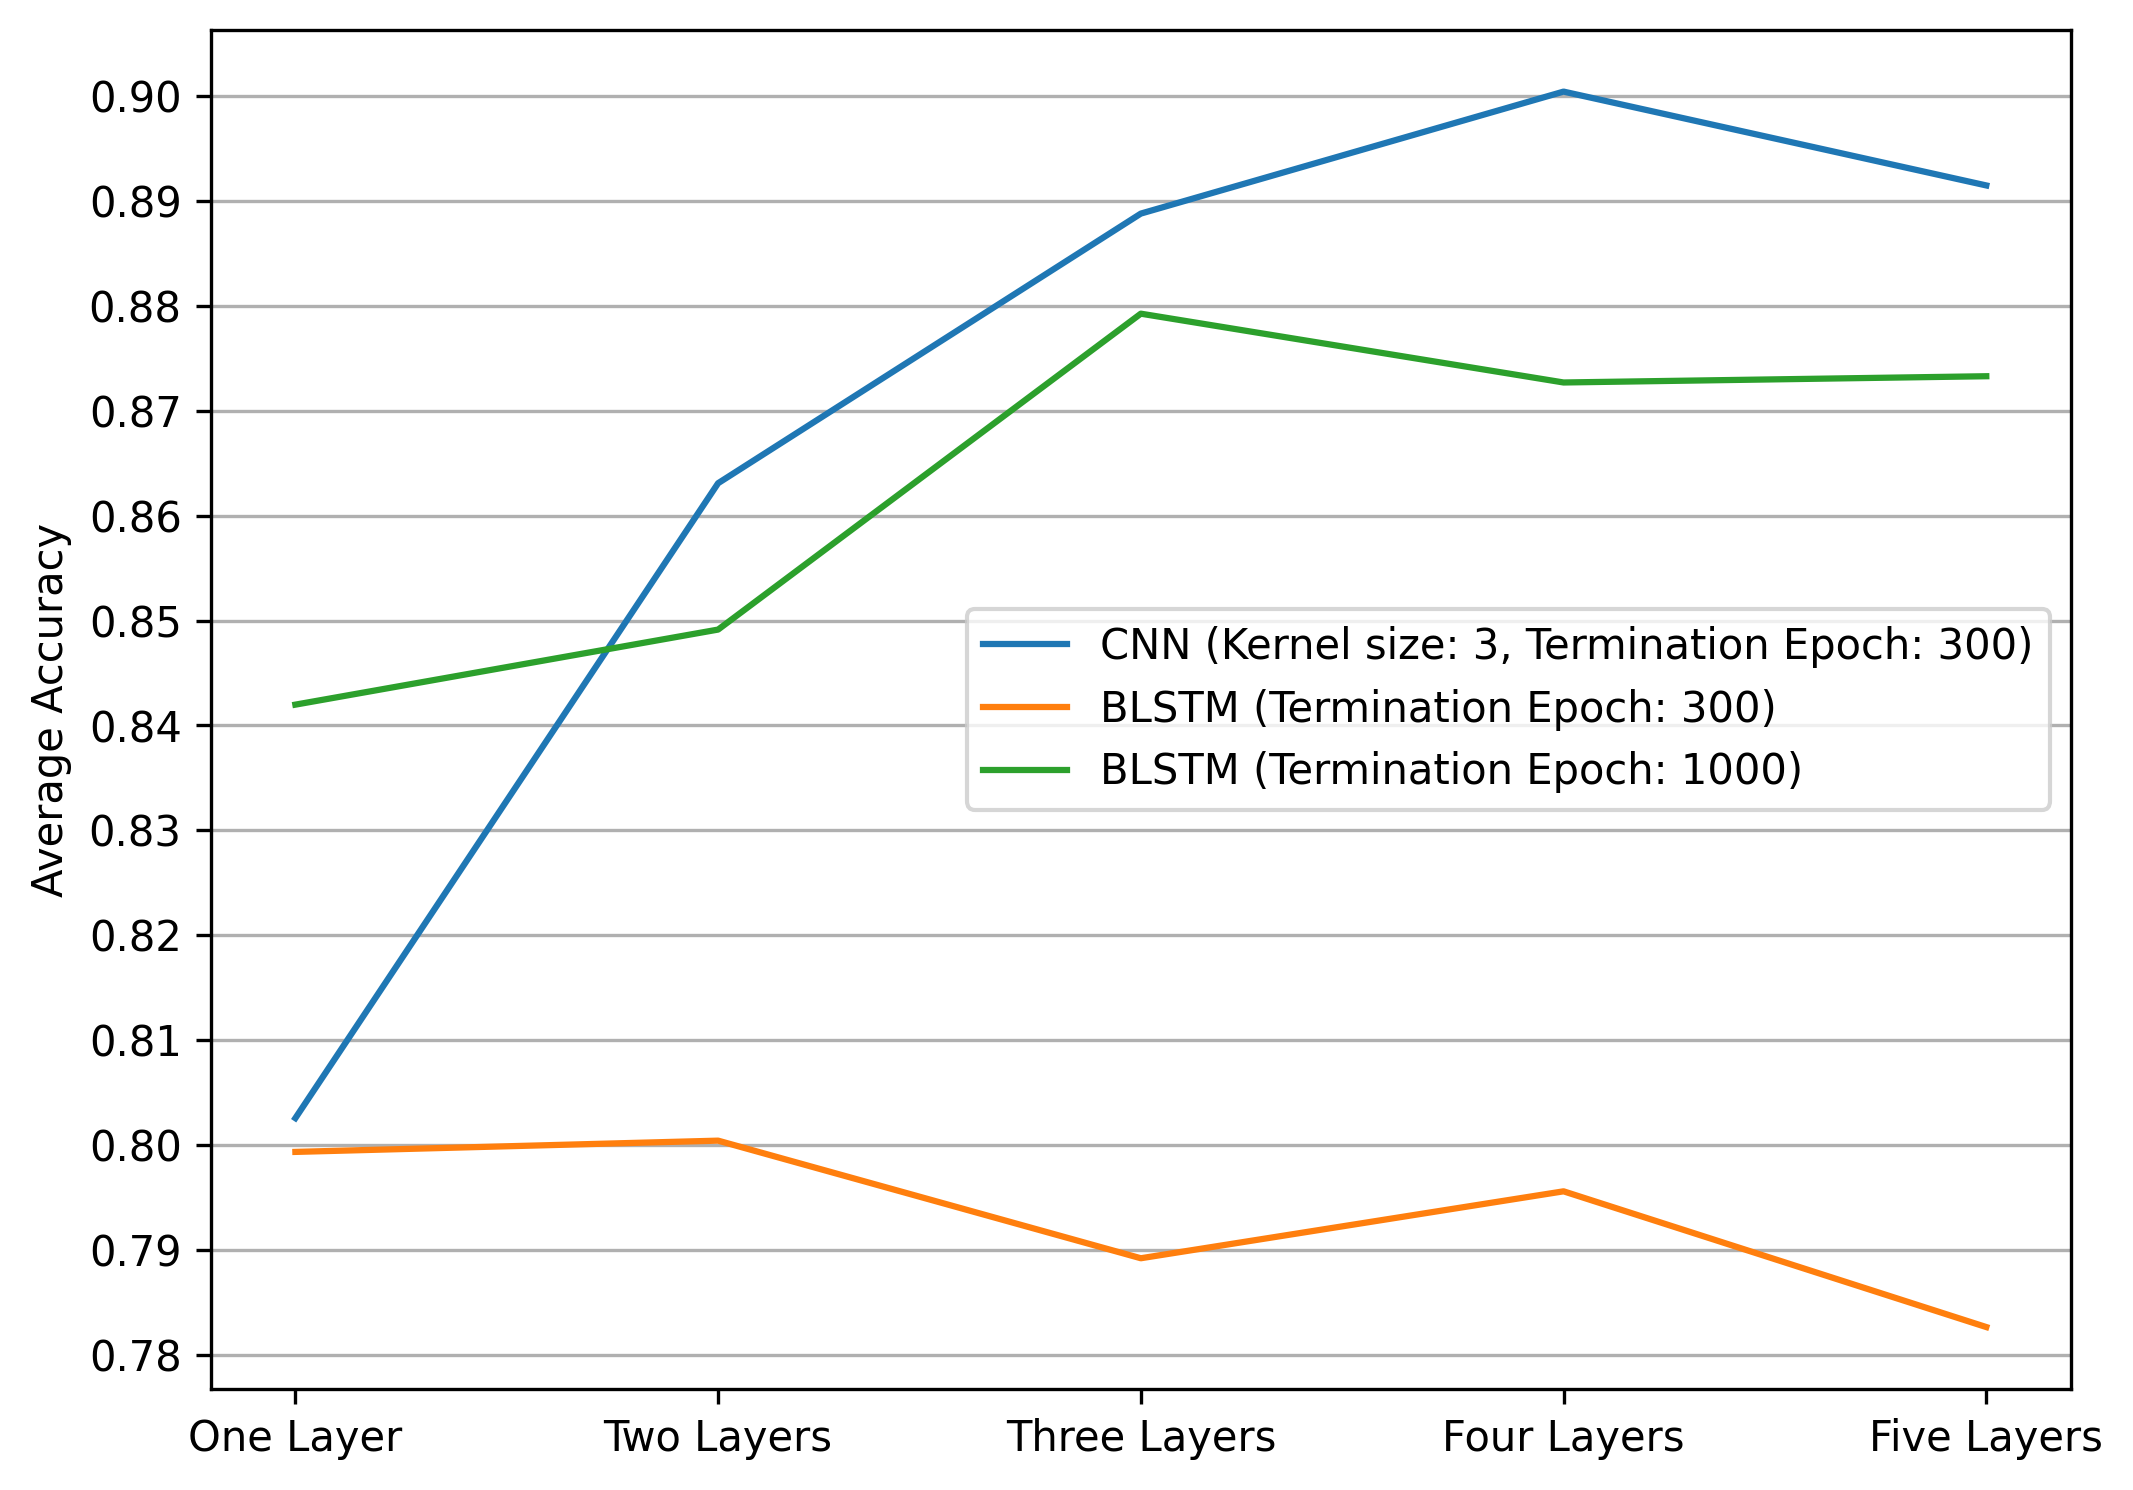

In [32]:
a = [
    {'name': 'CNN (Kernel size: 3, Termination Epoch: 300)' ,'list': cnn_arr_mean},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': blstm_arr_mean},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': blstm_ext_arr_mean}
]
plot_a(a)

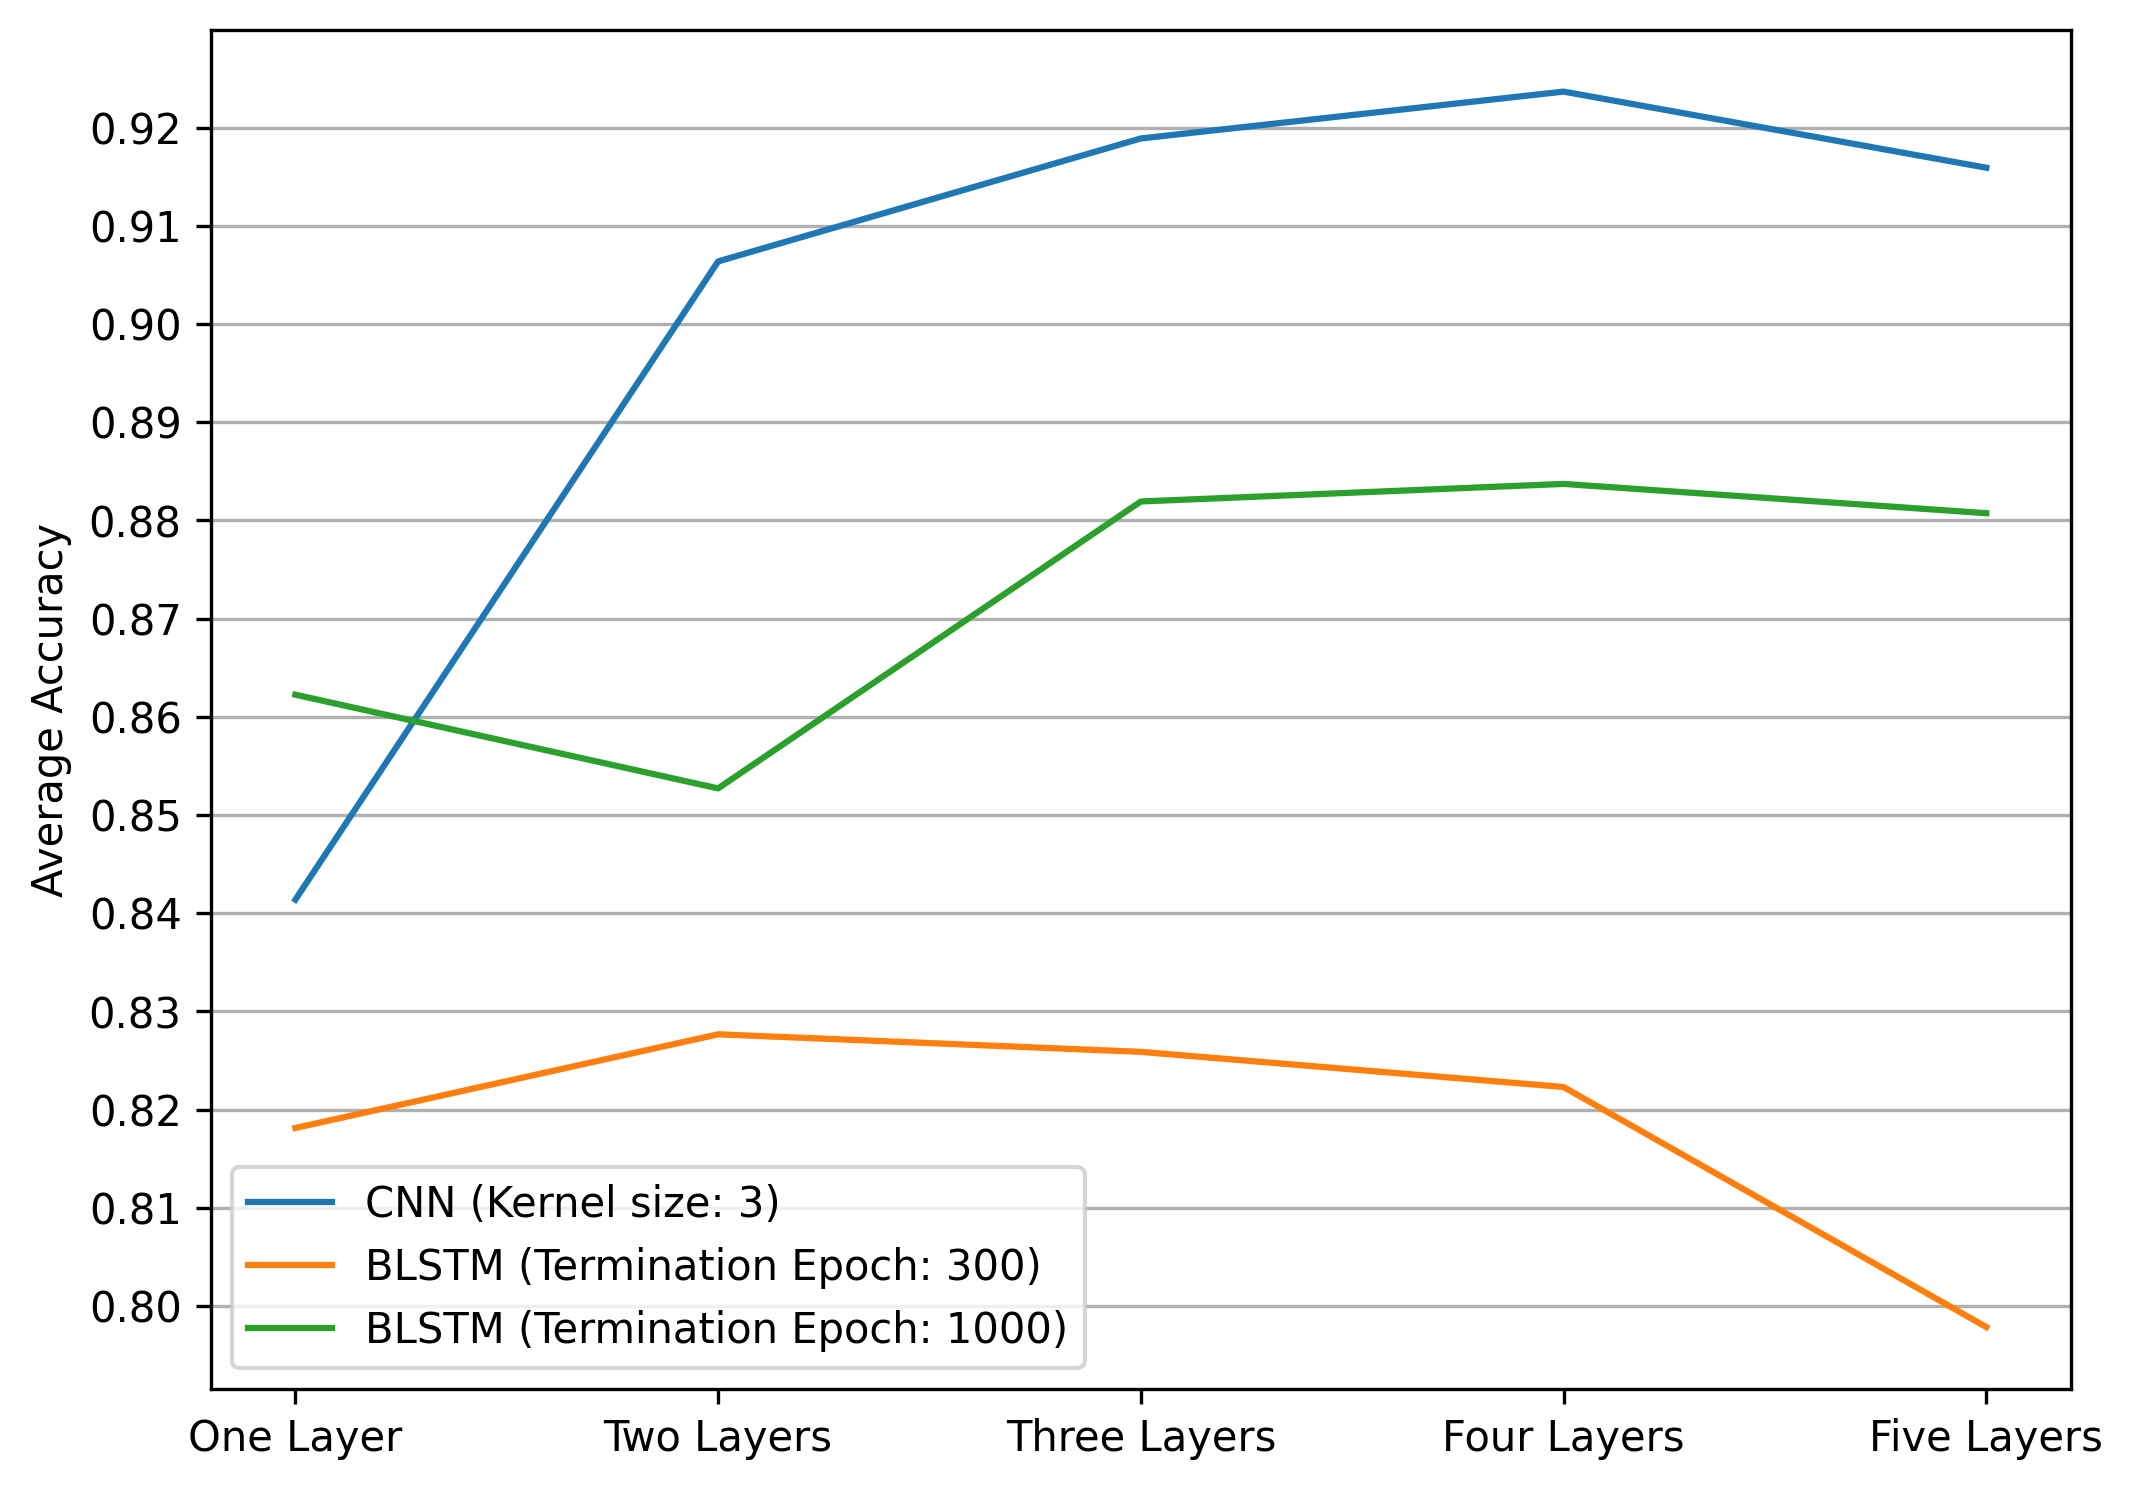

In [33]:
a = [
    {'name': 'CNN (Kernel size: 3)' ,'list': cnn_arr_max},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': blstm_arr_max},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': blstm_ext_arr_max}
]
plot_a(a)